In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [44]:
v_df = pd.read_csv('../data/photometry_v_13s.csv', index_col='slice')
b_df = pd.read_csv('../data/photometry_b_13s.csv', index_col='slice')

In [46]:
v_data = v_df[['Source_AMag_T1','Source_AMag_T2','Source_AMag_T3','Source_AMag_T4']]
v_err = v_df[['Source_AMag_Err_T1', 'Source_AMag_Err_T2', 'Source_AMag_Err_T3', 'Source_AMag_Err_T4']]

In [47]:
b_data = v_df[['Source_AMag_T1','Source_AMag_T2','Source_AMag_T3']]
b_err = v_df[['Source_AMag_Err_T1', 'Source_AMag_Err_T2', 'Source_AMag_Err_T3']]

In [73]:
def wa(vals, errs):
    a = np.sum(vals/errs**2)
    b = np.sum(1/errs**2)
    return a/b

def wstd(vals, mean):
    sse = np.sum((vals-mean)**2)
    return np.sqrt(1/(vals.size-1)*sse)



9.97907242293
7.77078743605
9.32945052362
8.82226834321


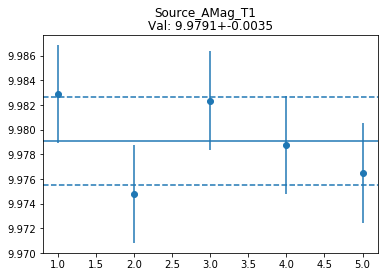

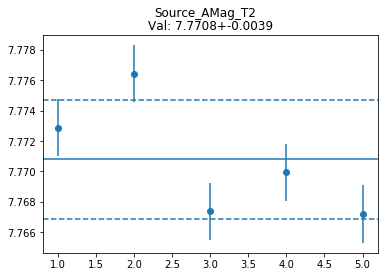

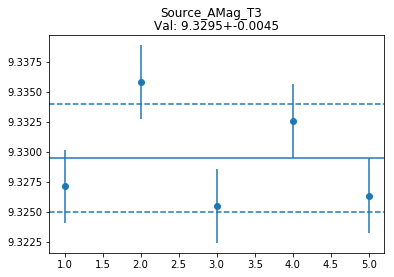

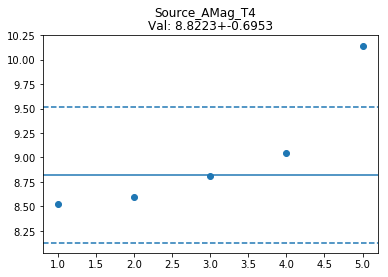

In [74]:
for dc, ec in zip(v_data.columns, v_err.columns):
    plt.figure()
    plt.errorbar(v_data.index, v_data[dc], yerr=v_err[ec], fmt='o')
    w = np.average(v_data[dc], weights=1/v_err[ec]**2)
    s = wstd(v_data[dc], w)
    plt.axhline(w)
    plt.axhline(w+s, ls='--')
    plt.axhline(w-s, ls='--')
    plt.suptitle(dc)
    plt.title('Val: {:.4f}+-{:.4f}'.format(w, s))
    print(w)

9.97907242293
7.77078743605
9.32945052362


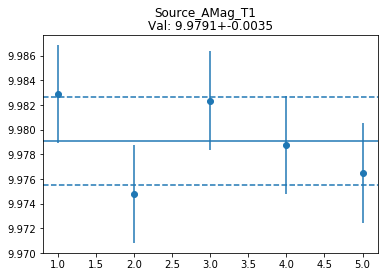

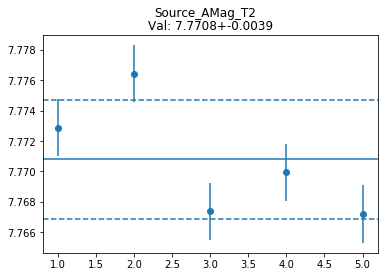

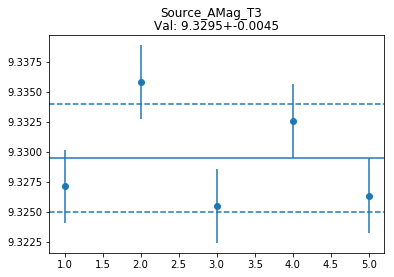

In [75]:
for dc, ec in zip(b_data.columns, b_err.columns):
    plt.figure()
    plt.errorbar(b_data.index, b_data[dc], yerr=b_err[ec], fmt='o')
    w = np.average(b_data[dc], weights=1/b_err[ec]**2)
    s = wstd(b_data[dc], w)
    plt.axhline(w)
    plt.axhline(w+s, ls='--')
    plt.axhline(w-s, ls='--')
    plt.suptitle(dc)
    plt.title('Val: {:.4f}+-{:.4f}'.format(w, s))
    print(w)